In [1125]:
import numpy as np
import pandas as pd

In [1126]:
# Load MutPred2 predictions
mutpred_predictions = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\MutPred2\\all_predictions.csv", header=None)
mutpred_predictions

,0,1,2,3,4,5
0,FGFR1_HUMAN,F9S,0.828,Altered Disordered interface (Pr = 0.25 | P = ...,ELME000041|ELME000106|ELME000137|ELME000146,-
1,FGFR1_HUMAN,W10P,0.922,Altered Ordered interface (Pr = 0.24 | P = 0.0...,ELME000041|ELME000137,-
2,FGFR1_HUMAN,A11R,0.872,Altered Disordered interface (Pr = 0.37 | P = ...,ELME000041|ELME000106,-
3,FGFR1_HUMAN,V12S,0.881,Altered Signal peptide (Pr = 0.16 | P = 4.8e-04),ELME000041|ELME000063|ELME000333|ELME000336,-
4,FGFR1_HUMAN,V14F,0.895,Altered Signal peptide (Pr = 0.21 | P = 2.6e-04),ELME000041|ELME000052|ELME000080|ELME000333|E...,-
...,...,...,...,...,...,...
4503,COL4A3_HUMAN,G1045V,0.957,NaN,ELME000231|ELME000233,-
4504,COL4A3_HUMAN,G871C,0.894,Altered Disordered interface (Pr = 0.27 | P = ...,None,-
4505,COL4A3_HUMAN,G853R,0.917,Loss of Loop (Pr = 0.30 | P = 7.9e-03); Altere...,ELME000062,-
4506,COL4A3_HUMAN,P25S,0.286,-,-,-


In [1127]:
# add headers
column_names = ["gene", "variant", "MutPred_score", "explain", "MutPred_pred", "nothing"]
mutpred_predictions.columns = column_names
mutpred_predictions = mutpred_predictions.drop(columns=["nothing", "explain", "MutPred_pred"])
mutpred_predictions

,gene,variant,MutPred_score
0,FGFR1_HUMAN,F9S,0.828
1,FGFR1_HUMAN,W10P,0.922
2,FGFR1_HUMAN,A11R,0.872
3,FGFR1_HUMAN,V12S,0.881
4,FGFR1_HUMAN,V14F,0.895
...,...,...,...
4503,COL4A3_HUMAN,G1045V,0.957
4504,COL4A3_HUMAN,G871C,0.894
4505,COL4A3_HUMAN,G853R,0.917
4506,COL4A3_HUMAN,P25S,0.286


In [1128]:
# Delete the _HUMAN from the gene name
mutpred_predictions["gene"] = mutpred_predictions["gene"].str.replace("_HUMAN", "")
print(len(mutpred_predictions))

4508


In [1129]:

# remove duplicates
mutpred_predictions = mutpred_predictions.drop_duplicates(subset=["gene", "variant"], keep="first")
print(len(mutpred_predictions))

4489


In [1130]:
# Load VEST4 predictions
VEST4_predictions = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\VEST4\\all_vest4_predictions.csv")
VEST4_predictions = VEST4_predictions.drop(columns=["S.O. transcript", "Amino acid position"])

# rename columns
# Change name of column "HUGO symbol" to "gene"
VEST4_predictions = VEST4_predictions.rename(columns={"HUGO symbol": "gene"})
# Change name of column "Protein sequence change" to "variant"
VEST4_predictions = VEST4_predictions.rename(columns={"Protein sequence change": "variant"})
# Change name of column "VEST4 score (missense)" to "VEST4_score"
VEST4_predictions = VEST4_predictions.rename(columns={"VEST score (missense)": "VEST_score"})
VEST4_predictions

,variant,gene,VEST_score
0,G6S,SLC26A4,0.104
1,M21V,SLC26A4,0.037
2,A51T,SLC26A4,0.188
3,C53G,SLC26A4,0.062
4,V163I,SLC26A4,0.725
...,...,...,...
4209,V1669I,MYO7A,0.345
4210,R816H,MYO7A,0.322
4211,P1724A,MYO7A,0.277
4212,I1157V,MYO7A,0.361


In [1131]:
# Combine the prediction files into one file
my_prediction = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\all_inbar_predictions.csv")
my_prediction



,position,pathogenicity,predictions,variant,gene
0,6,0,0,G6S,SLC26A4
1,21,0,1,M21V,SLC26A4
2,51,0,0,A51T,SLC26A4
3,53,0,1,C53G,SLC26A4
4,163,0,1,V163I,SLC26A4
...,...,...,...,...,...
4516,1045,1,1,G1045V,COL4A3
4517,871,1,1,G871C,COL4A3
4518,853,1,1,G853R,COL4A3
4519,25,0,0,P25S,COL4A3


In [1132]:
# Merge the two files
merged = pd.merge(my_prediction, mutpred_predictions, on=["gene", "variant"])
merged = pd.merge(merged, VEST4_predictions, on=["gene", "variant"])
merged

,position,pathogenicity,predictions,variant,gene,MutPred_score,VEST_score
0,6,0,0,G6S,SLC26A4,0.064,0.104
1,21,0,1,M21V,SLC26A4,0.022,0.037
2,51,0,0,A51T,SLC26A4,0.140,0.188
3,53,0,1,C53G,SLC26A4,0.125,0.062
4,163,0,1,V163I,SLC26A4,0.034,0.725
...,...,...,...,...,...,...,...
4250,1045,1,1,G1045V,COL4A3,0.957,0.986
4251,871,1,1,G871C,COL4A3,0.894,0.968
4252,853,1,1,G853R,COL4A3,0.917,0.979
4253,25,0,0,P25S,COL4A3,0.286,0.101


In [1133]:
print(f"length of merged {len(merged)}")
print(f"length of my_prediction {len(my_prediction)}")
print(f"length of mutpred {len(mutpred_predictions)}")

length of merged 4255
length of my_prediction 4521
length of mutpred 4489


In [1134]:
# # Save the merged file to csv
# merged.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\merged_my_prediction_and_mutpred.csv", index=False)

In [1135]:
## Calculate the MCC for the mutpred predictions, according to the real pathogenicity (0 or 1)
from sklearn.metrics import matthews_corrcoef

In [1136]:
# separate the merged dataframe according to gene
genes = merged["gene"].unique()
print(f"Number of genes: {len(genes)}")

Number of genes: 6


In [1137]:
# Calculate MCC for each gene specific predictor for mutpred

# Build dictionary with gene names as keys.
mccs = {gene: 0 for gene in genes}

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    # Assuming you have a DataFrame called 'data' with 'prediction' and 'MutPred_score' columns
    # Create binary predictions based on the 0.5 threshold
    gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
    
    gene_df['predictions'] = gene_df['predictions'].astype(int)
    
    # Calculate MCC
    mcc = matthews_corrcoef(gene_df['predictions'], gene_df['binary_prediction_mutpred'])
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    
    # Append mcc to dictionary
    mccs[gene] = mcc

print("MCCs of MutPred2 predictions for each gene:")
for gene in mccs:
    print(f"{gene}: {mccs[gene]}")


MCCs of MutPred2 predictions for each gene:
SLC26A4: 0.1499267512196578
FGFR1: 0.2112308970180335
COL2A1: 0.3887591437501871
COL4A5: 0.31750312269471653
MYO7A: 0.10205361580295146
COL4A3: 0.3982563463452467


C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\210585993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\210585993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['predictions'] = gene_df['predictions'].astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\210585993.py:10: SettingWithCopyWarning: 
A value is trying to be set 

In [1138]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, log_loss, confusion_matrix
# store the results in a dictionary
results = {gene: 0 for gene in genes}

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    y_true = gene_df["pathogenicity"].astype(int)
    predicted_probabilities = gene_df["MutPred_score"]
    gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
    predicted_labels = gene_df["binary_prediction_mutpred"]
    
    results_gene = {}
    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["roc_auc"] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    # append to dictionary
    results_gene["auc"] = roc_auc
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_true, predicted_probabilities)
    pr_auc = auc(recall, precision)
    # append to dictionary
    results_gene["pr_auc"] = pr_auc
    
    # Calculate F1 Score
    f1 = f1_score(y_true, predicted_labels)
    # append to dictionary
    results_gene["f1"] = f1
    
    # Calculate Log Loss
    logloss = log_loss(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["logloss"] = logloss
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted_labels)
    # append to dictionary
    results_gene["confusion_matrix"] = conf_matrix
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    # Append results to dictionary
    results[gene] = results_gene
    
## Print results
print("Results of MutPred2 predictions for each gene:")
for gene in results:
    print(f"{gene}: {results[gene]}")

Results of MutPred2 predictions for each gene:
SLC26A4: {'roc_auc': 0.9156057758031442, 'auc': 0.9156057758031442, 'pr_auc': 0.9635793095704372, 'f1': 0.8875502008032128, 'logloss': 0.3970164561294319, 'confusion_matrix': array([[ 77,  11],
       [ 45, 221]], dtype=int64)}
FGFR1: {'roc_auc': 0.7871252204585537, 'auc': 0.7871252204585537, 'pr_auc': 0.5713506443210331, 'f1': 0.5458612975391499, 'logloss': 0.8384706016744468, 'confusion_matrix': array([[167, 190],
       [ 13, 122]], dtype=int64)}
COL2A1: {'roc_auc': 0.9457924177775964, 'auc': 0.9457924177775964, 'pr_auc': 0.8914356346143124, 'f1': 0.6967418546365917, 'logloss': 0.5304918305429082, 'confusion_matrix': array([[443, 228],
       [ 14, 278]], dtype=int64)}
COL4A5: {'roc_auc': 0.9927696078431372, 'auc': 0.9927696078431372, 'pr_auc': 0.996314815055799, 'f1': 0.9657701711491442, 'logloss': 0.15585706721232567, 'confusion_matrix': array([[215,  15],
       [ 13, 395]], dtype=int64)}
MYO7A: {'roc_auc': 0.8624612344058806, 'auc':

C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2254649920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2254649920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2254649920.py:9: SettingWithCopyWarning

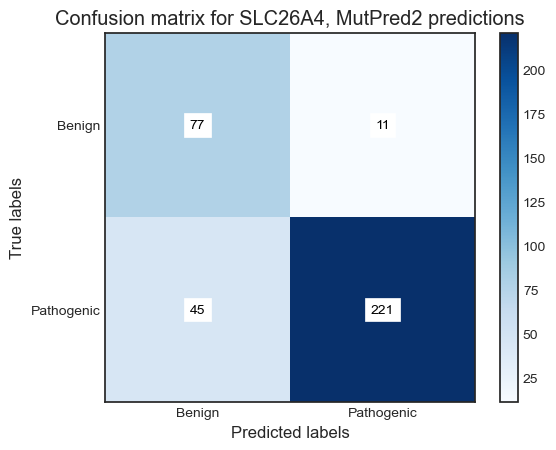

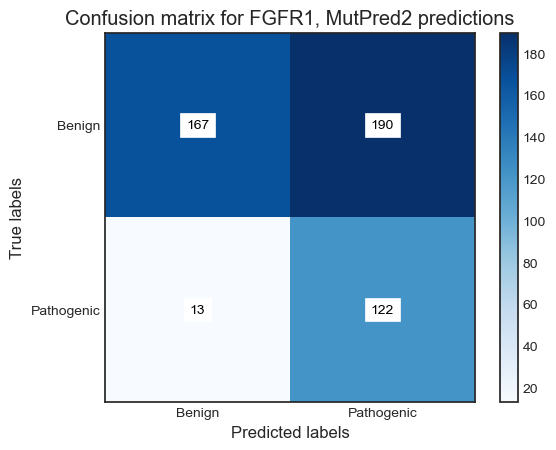

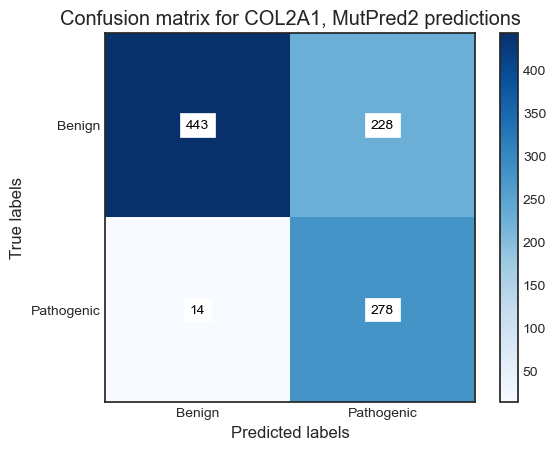

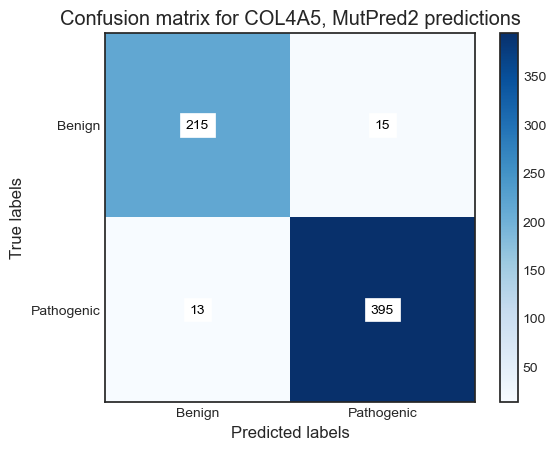

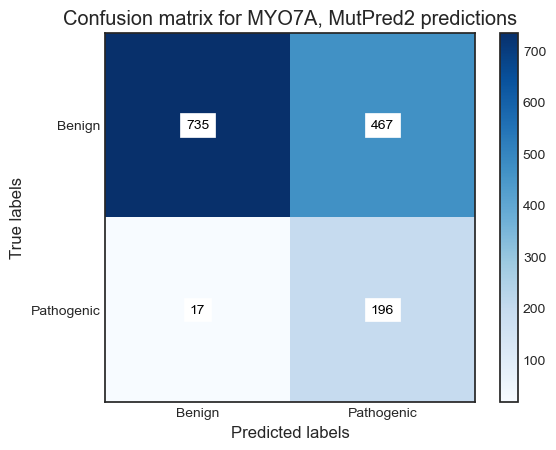

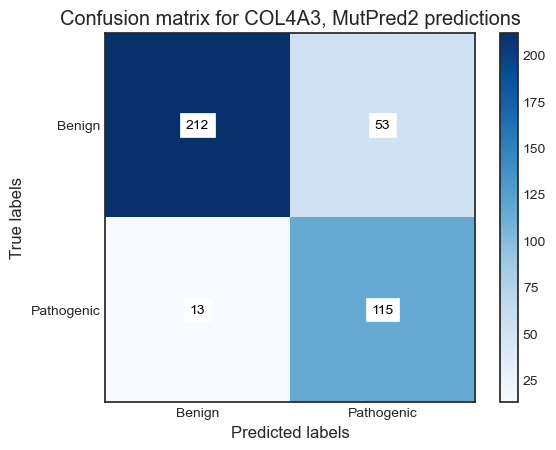

In [1139]:
# present the confusion matrix for each gene
import matplotlib.pyplot as plt

for gene in results:
    # Plot confusion matrix
    plt.imshow(results[gene]["confusion_matrix"], cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([0, 1], ["Benign", "Pathogenic"])
    plt.yticks([0, 1], ["Benign", "Pathogenic"])
    plt.title(f"Confusion matrix for {gene}, MutPred2 predictions")
    plt.style.use("seaborn-white")
    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, results[gene]["confusion_matrix"][i, j], ha="center", va="center", color="black", backgroundcolor="white")
    plt.colorbar()
    plt.show()

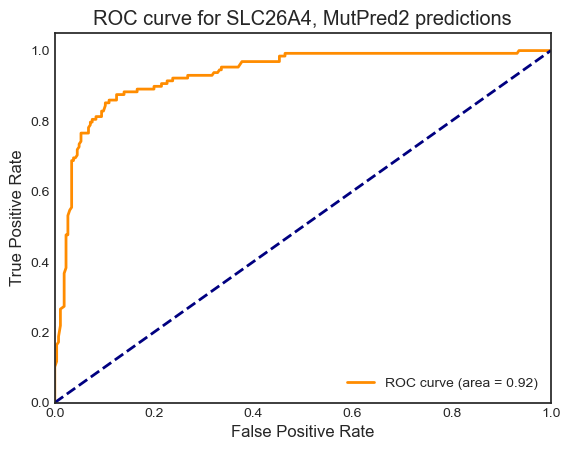

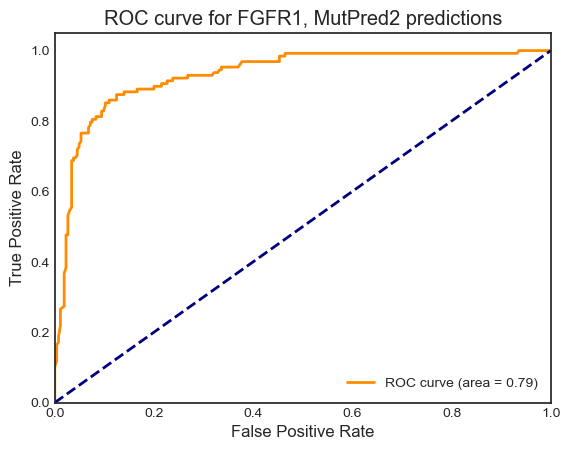

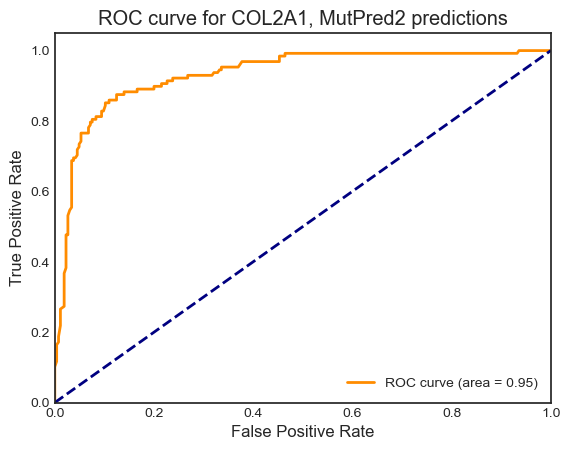

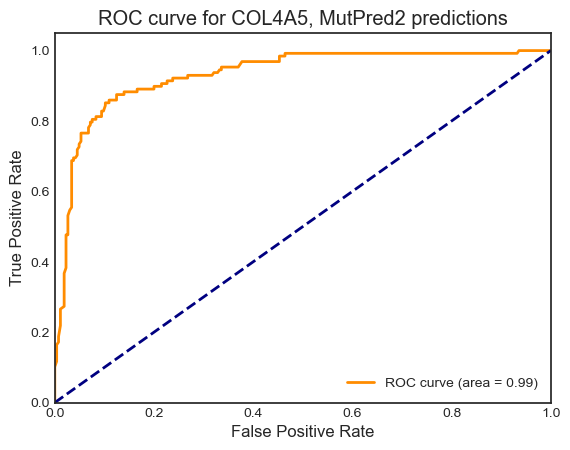

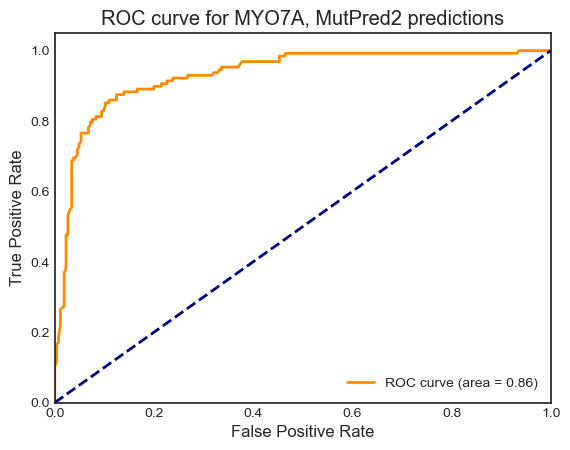

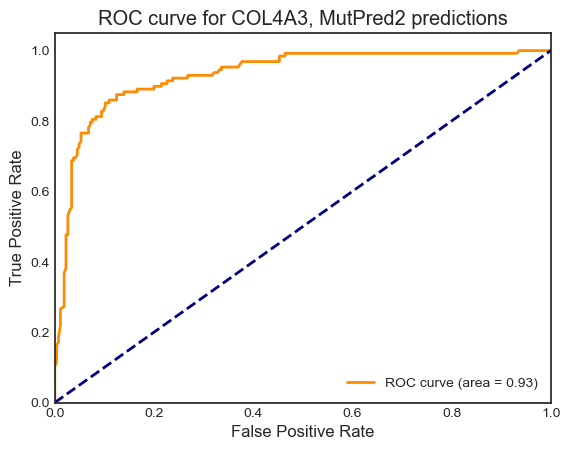

In [1140]:
# present the ROC curve for each gene
for gene in results:
    # Plot ROC curve
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {results[gene]['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curve for {gene}, MutPred2 predictions")
    plt.legend(loc="lower right")
    plt.show()

In [1141]:
# Calculate MCC for each gene specific predictor for mutpred

# Build dictionary with gene names as keys.
mccs = {gene: 0 for gene in genes}

merged['VEST_score'] = merged['VEST_score'].astype(float)

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    # change VEST score to float
    # Assuming you have a DataFrame called 'data' with 'prediction' and 'MutPred_score' columns
    # Create binary predictions based on the 0.5 threshold
    gene_df.loc[:, 'binary_prediction_VEST4'] = (gene_df['VEST_score'] > 0.5).astype(int)
    
    gene_df['pathogenicity'] = gene_df['pathogenicity'].astype(int)
    
    # Calculate MCC
    mcc = matthews_corrcoef(gene_df['pathogenicity'], gene_df['binary_prediction_VEST4'])
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    
    # Append mcc to dictionary
    mccs[gene] = mcc

print("MCCs of VEST4 predictions for each gene:")
for gene in mccs:
    print(f"{gene}: {mccs[gene]}")

MCCs of VEST4 predictions for each gene:
SLC26A4: 0.7987891490668503
FGFR1: 0.4958493102575163
COL2A1: 0.7494745890007775
COL4A5: 0.8881597269567008
MYO7A: 0.41391603341153166
COL4A3: 0.6959551872446919


C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2681871665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_VEST4'] = (gene_df['VEST_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2681871665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['pathogenicity'] = gene_df['pathogenicity'].astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\2681871665.py:13: SettingWithCopyWarning: 
A value is trying to be se

In [1142]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, log_loss, confusion_matrix
# store the results in a dictionary
results = {gene: 0 for gene in genes}

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    y_true = gene_df["pathogenicity"].astype(int)
    predicted_probabilities = gene_df["MutPred_score"]
    gene_df.loc[:, 'binary_prediction_VEST4'] = (gene_df['VEST_score'] > 0.5).astype(int)
    predicted_labels = gene_df["binary_prediction_VEST4"]
    
    results_gene = {}
    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["roc_auc"] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    # append to dictionary
    results_gene["auc"] = roc_auc
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_true, predicted_probabilities)
    pr_auc = auc(recall, precision)
    # append to dictionary
    results_gene["pr_auc"] = pr_auc
    
    # Calculate F1 Score
    f1 = f1_score(y_true, predicted_labels)
    # append to dictionary
    results_gene["f1"] = f1
    
    # Calculate Log Loss
    logloss = log_loss(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["logloss"] = logloss
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted_labels)
    # append to dictionary
    results_gene["confusion_matrix"] = conf_matrix
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    # Append results to dictionary
    results[gene] = results_gene
    
## Print results
print("Results of VEST4 predictions for each gene:")
for gene in results:
    print(f"{gene}: {results[gene]}")

Results of VEST4 predictions for each gene:
SLC26A4: {'roc_auc': 0.9156057758031442, 'auc': 0.9156057758031442, 'pr_auc': 0.9635793095704372, 'f1': 0.9518518518518518, 'logloss': 0.3970164561294319, 'confusion_matrix': array([[ 71,  17],
       [  9, 257]], dtype=int64)}
FGFR1: {'roc_auc': 0.7871252204585537, 'auc': 0.7871252204585537, 'pr_auc': 0.5713506443210331, 'f1': 0.6310679611650486, 'logloss': 0.8384706016744468, 'confusion_matrix': array([[210, 147],
       [  5, 130]], dtype=int64)}
COL2A1: {'roc_auc': 0.9457924177775964, 'auc': 0.9457924177775964, 'pr_auc': 0.8914356346143124, 'f1': 0.8216833095577746, 'logloss': 0.5304918305429082, 'confusion_matrix': array([[550, 121],
       [  4, 288]], dtype=int64)}
COL4A5: {'roc_auc': 0.9927696078431372, 'auc': 0.9927696078431372, 'pr_auc': 0.996314815055799, 'f1': 0.9606674612634089, 'logloss': 0.15585706721232567, 'confusion_matrix': array([[202,  28],
       [  5, 403]], dtype=int64)}
MYO7A: {'roc_auc': 0.8624612344058806, 'auc': 0.

C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\517102224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_VEST4'] = (gene_df['VEST_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\517102224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_VEST4'] = (gene_df['VEST_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_28888\517102224.py:9: SettingWithCopyWarning: 
A value is

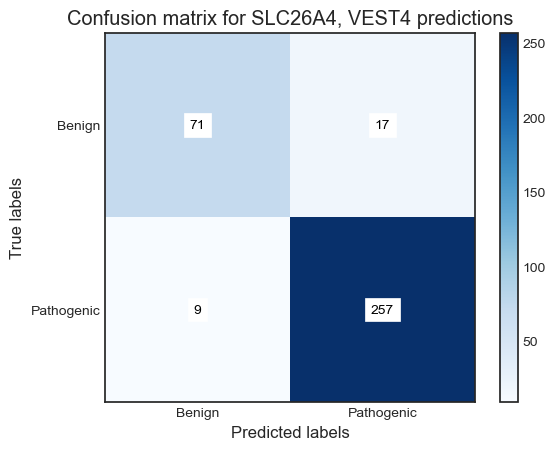

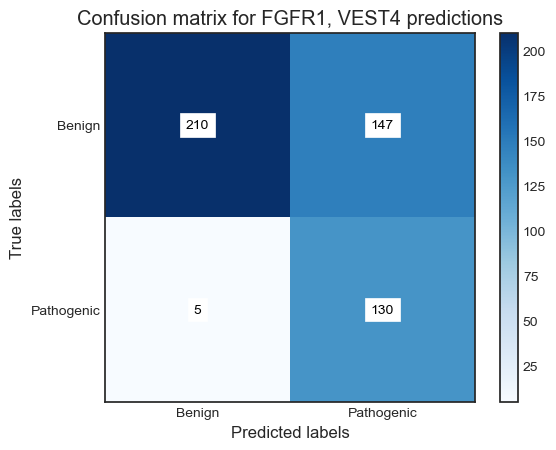

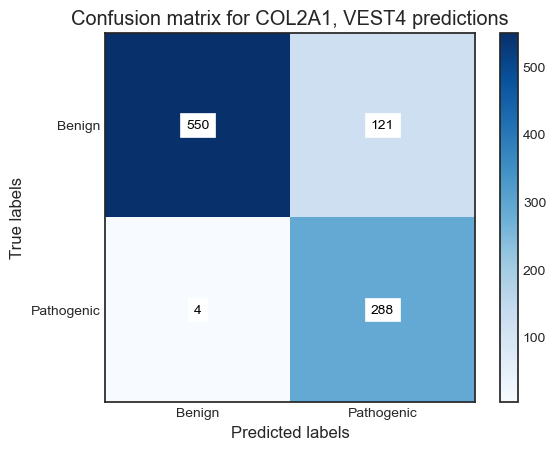

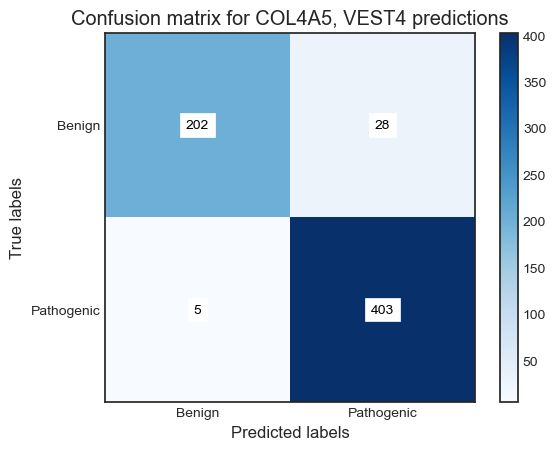

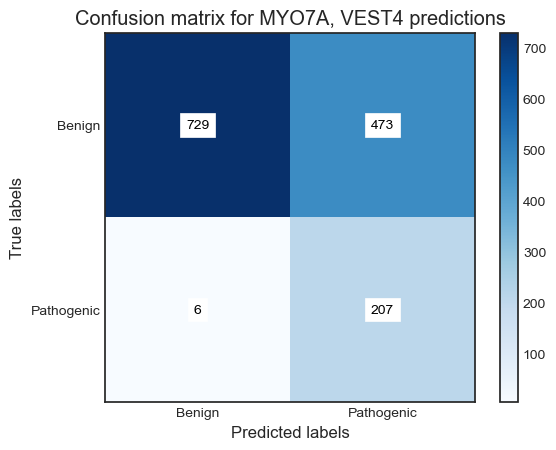

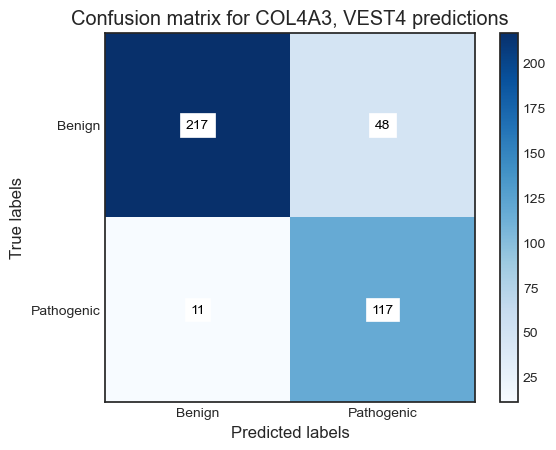

In [1143]:
# present the confusion matrix for each gene
import matplotlib.pyplot as plt

for gene in results:
    # Plot confusion matrix
    plt.imshow(results[gene]["confusion_matrix"], cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([0, 1], ["Benign", "Pathogenic"])
    plt.yticks([0, 1], ["Benign", "Pathogenic"])
    plt.title(f"Confusion matrix for {gene}, VEST4 predictions")
    plt.style.use("seaborn-white")
    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, results[gene]["confusion_matrix"][i, j], ha="center", va="center", color="black", backgroundcolor="white")
    plt.colorbar()
    plt.show()

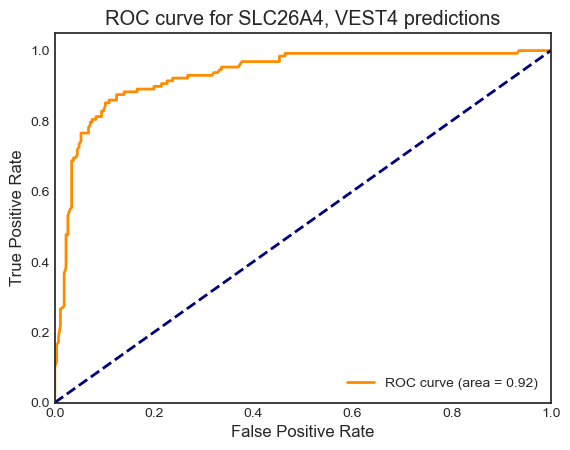

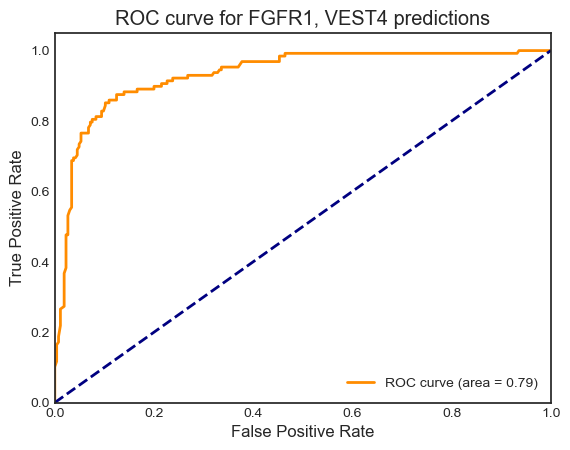

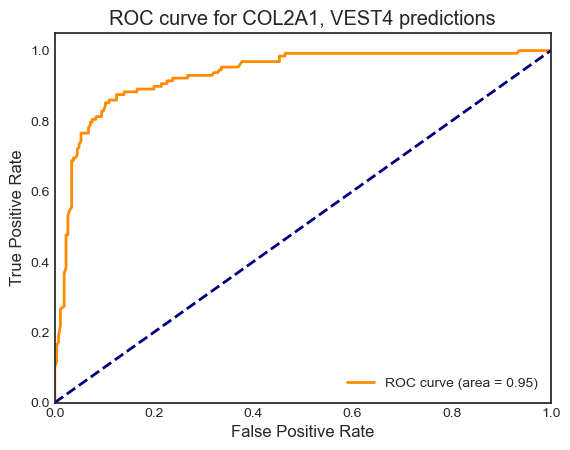

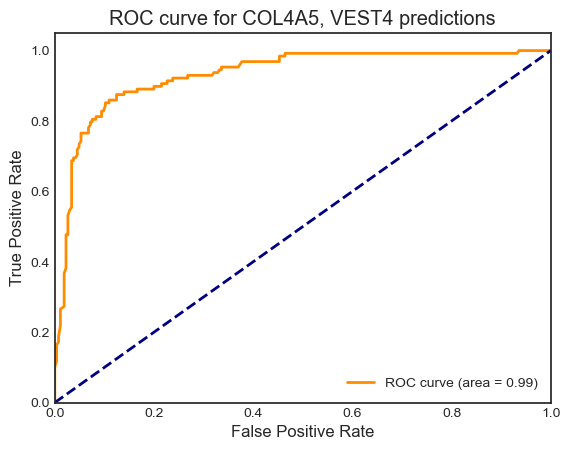

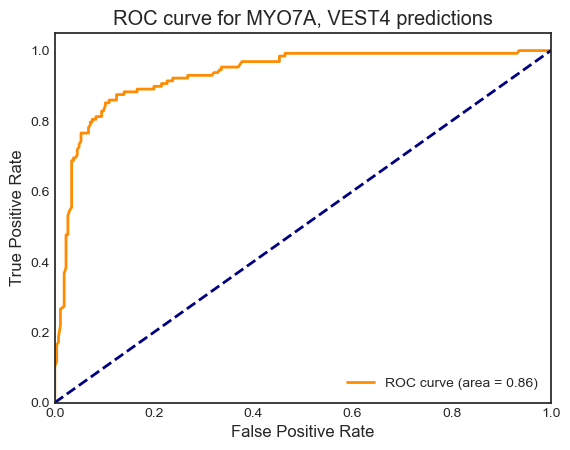

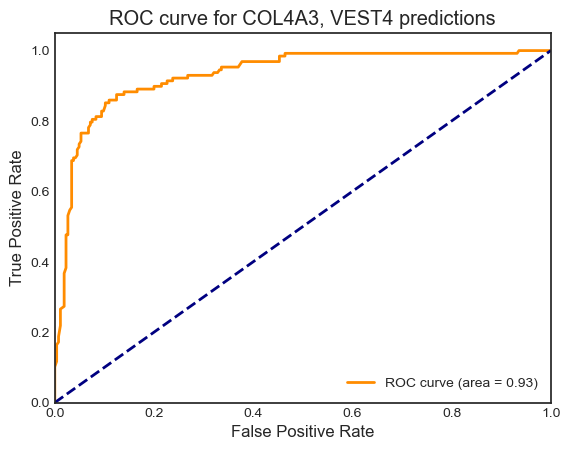

In [1144]:
#present the ROC curve for each gene
for gene in results:
    # Plot ROC curve
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {results[gene]['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curve for {gene}, VEST4 predictions")
    plt.legend(loc="lower right")
    plt.show()